In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
T = 50  # Number of time intervals
num_iterations = 200  # Number of random constant sets per interval

import random

# Predefined sets of values
B_t_values = [50, 75, 100, 125]  # Bandwidth in MHz
P_t_values = [1.0, 1.5, 2.0, 2.5]  # Power in W
f_t_values = [100, 150, 180, 200]  # Computational power
R_t_values = [0.6, 0.8, 0.9, 1]  # Reliability
L_comm_t_values = [0.5, 1.0, 1.5, 2.0]  # Latency in ms
E_t_values = [30, 10, 30, 50]  # Energy consumption

# Random sampling ranges for constants
G_t_range = (1.4, 1.8)
N_t_range = (0.005, 0.015)
I_t_range = (0.02, 0.05)
eta_t_range = (1.5, 3.0)
phi_t_range = (110, 130)

# Constraint limits
D_th = 5  # Latency threshold
R_th = 0.5  # Reliability threshold
B_max = 250  # Maximum bandwidth
P_max = 3.0  # Maximum power
E_max = 60  # Maximum energy consumption
f_max = 250  # Maximum computational power
L_edge_th = 2.5  # Latency due to edge computation threshold
eta_th = 1.8  # Threshold for sensing accuracy
phi_th = 110  # Threshold for sensing rate# Weight constants (alpha values and lambda, example values)
alpha_1, alpha_2, alpha_3, alpha_4, alpha_5 = 1.0, 1.0, 1.0, 1.0, 1.0
beta_1 = 1.0
lambda_const = 0.1

# Define the utility function
def utility_function(B_t, P_t, f_t, G_t, N_t, I_t, eta_t, phi_t, R_t, L_comm_t, E_t):
    C_t = B_t * np.log2(1 + P_t * G_t / (N_t + I_t))
    L_edge_t = 1 / (alpha_5 * f_t + beta_1 * C_t)
    L_t = L_comm_t + L_edge_t
    term1 = alpha_1 * np.log2(1 + P_t * G_t / (N_t + I_t))
    term2 = alpha_2 * f_t
    term3 = alpha_3 * (eta_t * phi_t / B_t)
    term4 = alpha_4 * (R_t / L_t)
    utility = term1 + term2 + term3 + term4 - lambda_const * E_t
    return utility, utility / E_t  # Return both U_t and U_t / E_t

# Function to check if constraints are satisfied
def check_constraints(B_t, P_t, f_t, G_t, N_t, I_t, eta_t, phi_t, R_t, L_comm_t, E_t):
    C_t = B_t * np.log2(1 + P_t * G_t / (N_t + I_t))
    L_edge_t = 1 / (alpha_5 * f_t + beta_1 * C_t)
    L_t = L_comm_t + L_edge_t

    if L_edge_t > L_edge_th:
        return False
    if L_t > D_th:
        return False
    if B_t > B_max:
        return False
    if P_t > P_max:
        return False
    if f_t > f_max:
        return False
    if eta_t < eta_th:
        return False
    if phi_t < phi_th:
        return False
    if R_t < R_th:
        return False
    if E_t > E_max:
        return False

    return True  # All constraints are satisfied

# Storage for plotting data
# Store data for plotting
utility_vs_bandwidth = []
utility_vs_capacity = []
lt_vs_capacity = []
lt_line = []
lcomt_line = []
utility_vs_eta = []  # For plotting utility vs sensing accuracy
capacity_vs_power = []  # For plotting C_t vs P_t
lcommt_vs_capacity=[]
term3_values = []
utility_vs_reliability = []
lt_edge_vs_ft = []


# Store data for plotting
utility2_vs_bandwidth = []
utility2_vs_capacity = []
lt2_vs_capacity = []
lt_line2 = []
lcomt_line2 = []
utility2_vs_eta = []  # For plotting utility vs sensing accuracy
capacity2_vs_power = []  # For plotting C_t vs P_t
lcommt2_vs_capacity=[]
term3_values_2 = []
utility2_vs_reliability = []
lt_edge2_vs_ft = []




# Main computation
total_utility = 0  # Initialize total normalized utility
total_utility2 = 0
for t in range(T):  # Loop over time intervals
    utilities1 = []
    utilities2 =[]
    for i in range(num_iterations):  # Loop over iterations
        G_t = np.random.uniform(*G_t_range)
        N_t = np.random.uniform(*N_t_range)
        I_t = np.random.uniform(*I_t_range)
        eta_t = np.random.uniform(*eta_t_range)
        phi_t = np.random.uniform(*phi_t_range)

        if not check_constraints(B_t_values[0], P_t_values[0], f_t_values[0], G_t, N_t, I_t, eta_t, phi_t, R_t_values[0], L_comm_t_values[0], E_t_values[0]):
            continue

        max_utility = -np.inf
        max_utility2 = -np.inf
        max_utility_ratio  = 0

        for j in range(len(B_t_values)):  # Loop over parameter sets
            B_t = B_t_values[j]
            P_t = P_t_values[j]
            f_t = f_t_values[j]
            R_t = R_t_values[j]
            L_comm_t = L_comm_t_values[j]
            E_t = E_t_values[j]




            if not check_constraints(B_t, P_t, f_t, G_t, N_t, I_t, eta_t, phi_t, R_t, L_comm_t, E_t):
                continue

            utility, utility_ratio = utility_function(B_t, P_t, f_t, G_t, N_t, I_t, eta_t, phi_t, R_t, L_comm_t, E_t)

            if utility_ratio > max_utility_ratio:
                max_utility = utility
                max_utility_ratio = utility_ratio



            C_t = B_t * np.log2(1 + P_t * G_t / (N_t + I_t))

            # Store L_t vs C_t for plotting the latency
            L_edge_t = 1 / (alpha_5 * f_t + beta_1 * C_t)
            L_comm_t_values = [2, 2.5, 3, 3.5]
            L_t = L_comm_t + L_edge_t
            lt_vs_capacity.append((C_t, L_t))
            lcommt_vs_capacity.append((C_t,L_comm_t))



             # Store L_edge_t vs f_t for plotting
            lt_edge_vs_ft.append((L_edge_t,f_t))

             # Calculate and store term3
            term3 = alpha_3 * (eta_t * phi_t / B_t)
            term3_values.append((phi_t, term3))
            term3_values_2.append((phi_t, term3))

            utility_vs_reliability.append((R_t,max_utility))

            # Store C_t vs P_t for plotting
            capacity_vs_power.append((C_t, P_t))

            utility_vs_bandwidth.append((B_t,max_utility))

            if (utility > max_utility2):
                max_utility2 = utility

            # Store utility vs channel capacity
            lt2_vs_capacity.append((C_t, L_t))
            lcommt2_vs_capacity.append((C_t,L_comm_t))
            capacity2_vs_power.append((C_t,P_t))
            utility2_vs_capacity.append((C_t,max_utility2))

            C_t = B_t * np.log2(1 + P_t * G_t / (N_t + I_t))
            utility_vs_capacity.append((C_t,max_utility))



            # Store utility vs sensing accuracy (η_t)
            utility_vs_eta.append((eta_t,max_utility))
            utility2_vs_eta.append((eta_t,max_utility2))

             # Store L_edge_t vs f_t for plotting

            lt_edge2_vs_ft.append((f_t, L_edge_t))

             # Calculate and store term3
            term3 = alpha_3 * (eta_t * phi_t / B_t)
            term3_values.append((phi_t, term3))

            utility2_vs_reliability.append((R_t,max_utility2))

            # Store C_t vs P_t for plotting
            capacity_vs_power.append((C_t, P_t))
            utility2_vs_bandwidth.append((B_t,max_utility2))

        if max_utility != -np.inf:
            utilities1.append(max_utility)
        if max_utility2 != -np.inf:
            utilities2.append(max_utility2)

     # Average utility for this time interval
    if utilities1:
        avg_utility1 = np.mean(utilities1)
        total_utility += avg_utility1
    if utilities2:
        avg_utility2 = np.mean(utilities2)
        total_utility2 += avg_utility2

# Print total utility
print(f"Total Utility (Algorithm 2): {total_utility}")
print(f"Total Utility2 (Algorithm 1): {total_utility2}")


Total Utility (Algorithm 2): 7947.154567951155
Total Utility2 (Algorithm 1): 10205.112788684512


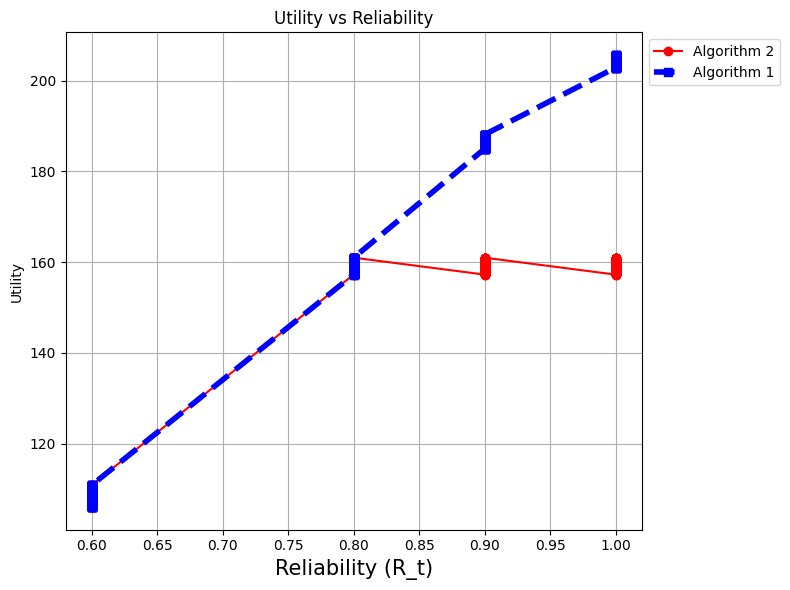

In [4]:
# Plot 1: Utility vs Reliability (Line graph)
plt.figure(figsize=(8,6))

reliabilities, utilities = zip(*utility_vs_reliability)
sorted_reliabilities, sorted_utilities = zip(*sorted(zip(reliabilities, utilities)))
reliabilities2, utilities2 = zip(*utility2_vs_reliability)
sorted_reliabilities2, sorted_utilities2 = zip(*sorted(zip(reliabilities2, utilities2)))
plt.plot(sorted_reliabilities,sorted_utilities, marker='o', linestyle='-', linewidth=1.5, color='red' , label='Algorithm 2')
plt.plot(sorted_reliabilities2,sorted_utilities2, marker='s', linestyle='--', linewidth =4,color='blue' , label='Algorithm 1')

plt.xlabel("Reliability (R_t)", fontsize=15)
plt.ylabel("Utility")
plt.title("Utility vs Reliability")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("Utility Vs Reliability.png", dpi=1000, bbox_inches='tight')

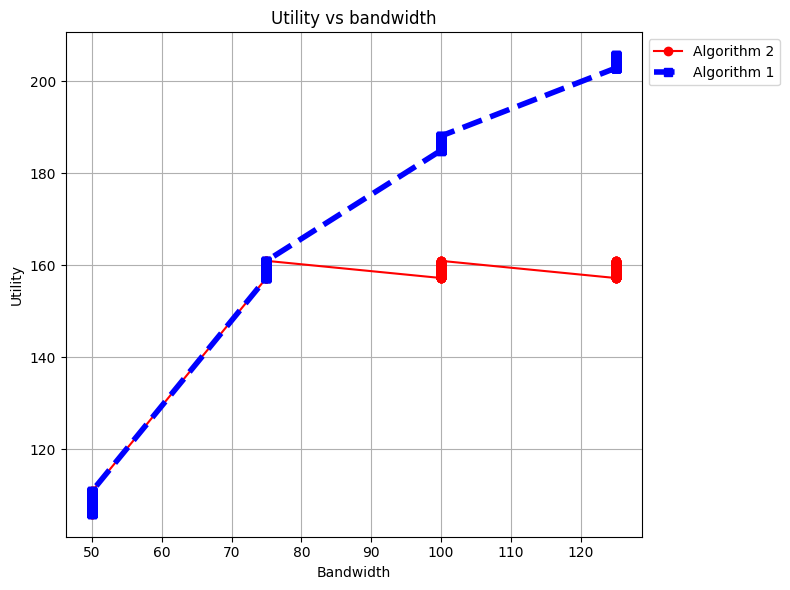

In [5]:
 plt.figure(figsize=(8,6))

bandwidth, utilities = zip(*utility_vs_bandwidth)
sorted_bandwidth, sorted_utilities = zip(*sorted(zip(bandwidth, utilities)))

bandwidth2, utilities2 = zip(*utility2_vs_bandwidth)
sorted_bandwidth2, sorted_utilities2 = zip(*sorted(zip(bandwidth2, utilities2)))

plt.plot(sorted_bandwidth,sorted_utilities, marker='o', linestyle='-', color='red',linewidth=1.5 , label='Algorithm 2')
plt.plot(sorted_bandwidth2,sorted_utilities2, marker='s', linestyle='--',linewidth=4, color='blue' , label='Algorithm 1')

plt.xlabel("Bandwidth")
plt.ylabel("Utility")
plt.title("Utility vs bandwidth")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("Utility Vs bandwidth.png", dpi=1000, bbox_inches='tight')

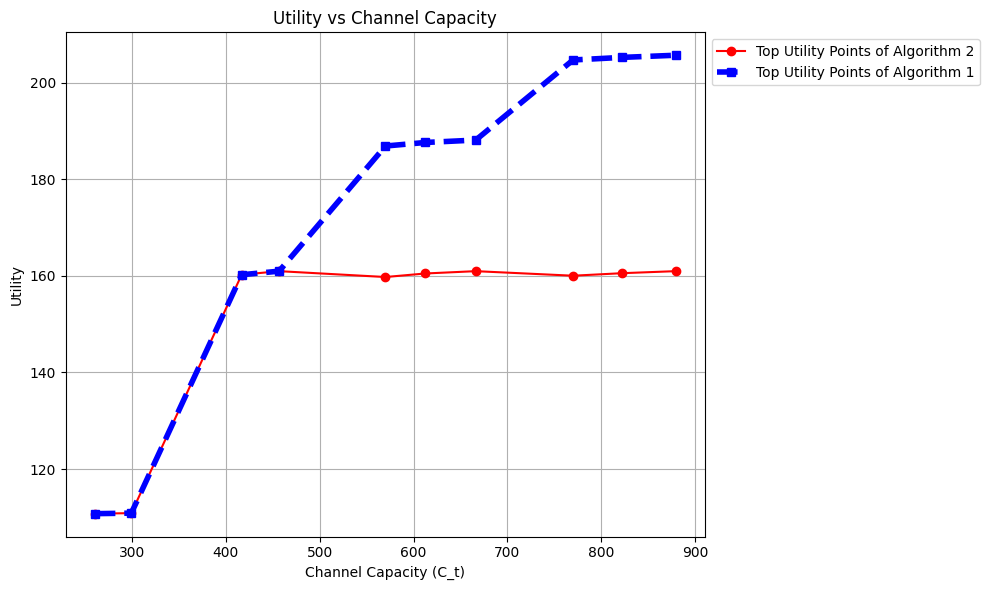

In [6]:
## UTILITY VS C_t

# Sort by channel capacity for easier binning
utility_vs_capacity.sort()
utility2_vs_capacity.sort()

# Bin data into channel capacity intervals for calculating top and median points
num_bins = 10
capacity_values, utility_values = zip(*utility_vs_capacity)
capacity_values, utility_values2 = zip(*utility2_vs_capacity)
bin_indices = np.linspace(min(capacity_values), max(capacity_values), num_bins + 1)

top_points = []
top_points_2=[]
for i in range(num_bins):
    # Filter points within the current bin
    bin_start = bin_indices[i]
    bin_end = bin_indices[i + 1]
    bin_points = [(c, u) for c, u in utility_vs_capacity if bin_start <= c < bin_end]
    bin_points2 = [(c, u2) for c, u2 in utility2_vs_capacity if bin_start <= c < bin_end]
    if bin_points:
        capacities, utilities = zip(*bin_points)
        capacities, utilities2 = zip(*bin_points2)
        # Top point in bin
        top_points.append((np.mean(capacities), max(utilities)))
        top_points_2.append((np.mean(capacities), max(utilities2)))
# Extract points for plotting
top_capacities, top_utilities = zip(*top_points)
top_capacities, top_utilities2 = zip(*top_points_2)

# Plot
plt.figure(figsize=(10, 6))

# Plot top points and connect them with a line
plt.plot(top_capacities, top_utilities, color='red', marker='o',linewidth=1.5, label="Top Utility Points of Algorithm 2", linestyle='-')
plt.plot(top_capacities, top_utilities2, color='blue', marker='s',linewidth=4, label="Top Utility Points of Algorithm 1", linestyle='--')
# Plot median points and connect them with a line


# Labels and title
plt.xlabel("Channel Capacity (C_t)")
plt.ylabel("Utility")
plt.title("Utility vs Channel Capacity")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("Utility Vs Channel Capacity.png", dpi=1000, bbox_inches='tight')
plt.show()

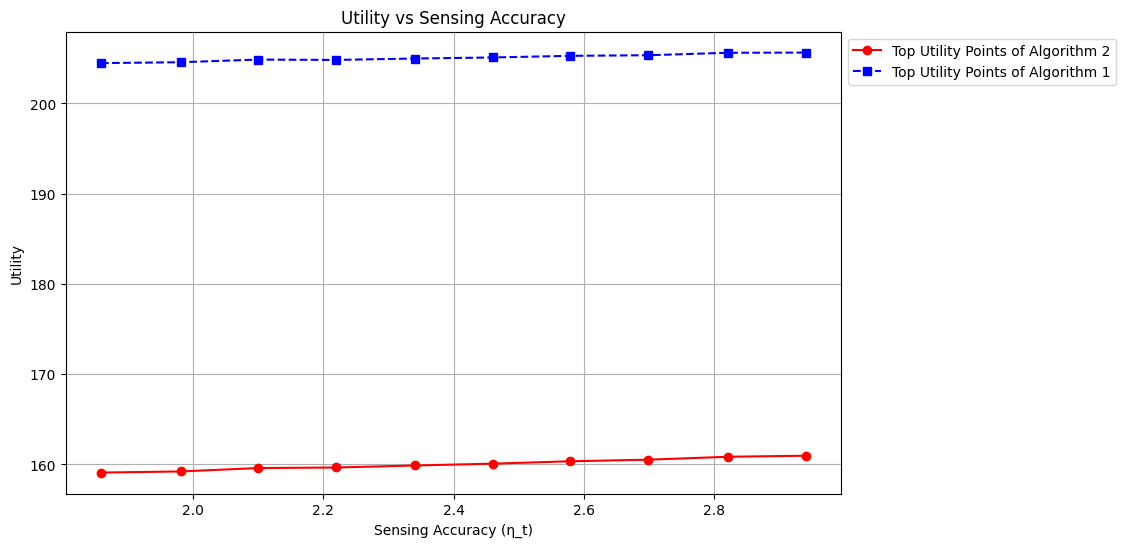

In [7]:
## UTILITY VS Sensing Accuracy
# Sort by eta (sensing accuracy) for easier binning
utility_vs_eta.sort()
utility2_vs_eta.sort()

# Bin data into eta intervals for calculating top and median points
num_bins = 10
eta_values, utility_values = zip(*utility_vs_eta)
eta_values, utility_values2 = zip(*utility2_vs_eta)
bin_indices = np.linspace(min(eta_values), max(eta_values), num_bins + 1)

top_points = []
top_points_2 = []

for i in range(num_bins):
    # Filter points within the current bin
    bin_start = bin_indices[i]
    bin_end = bin_indices[i + 1]
    bin_points = [(e, u) for e, u in utility_vs_eta if bin_start <= e < bin_end]
    bin_points2 = [(e, u2) for e, u2 in utility2_vs_eta if bin_start <= e < bin_end]

    if bin_points:
        etas, utilities = zip(*bin_points)
        etas, utilities2 = zip(*bin_points2)
        top_points.append((np.mean(etas), max(utilities)))  # Top point in bin
        top_points_2.append((np.mean(etas), max(utilities2)))  # Median point in bin

# Extract points for plotting
top_etas, top_utilities = zip(*top_points)
top_etas, top_utilities2 = zip(*top_points_2)

# Plot
plt.figure(figsize=(10, 6))

# Plot top points and connect them with a line
plt.plot(top_etas, top_utilities, color='red', marker='o', label="Top Utility Points of Algorithm 2", linestyle='-')

# Plot median points and connect them with a line
plt.plot(top_etas, top_utilities2, color='blue', marker='s', linestyle='--', label="Top Utility Points of Algorithm 1")

# Labels and title
plt.xlabel("Sensing Accuracy (η_t)")
plt.ylabel("Utility")
plt.title("Utility vs Sensing Accuracy")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig("Utility Vs Sensing Accuracy.png", dpi=1000, bbox_inches='tight')
plt.show()

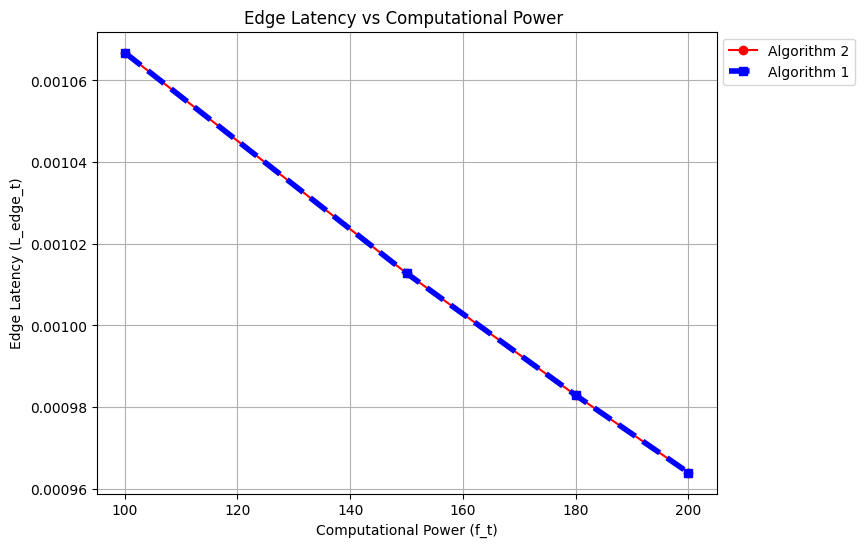

In [8]:
#Edge Latency vs Computational Power
plt.figure(figsize=(8, 6))
#Assumin C_t as constant.
L_edge_t_values = [1/(alpha_5*f_t + beta_1*C_t) for f_t in f_t_values]
L_edge_t_values_2 = [1/(alpha_5*f_t + beta_1*C_t) for f_t in f_t_values]

plt.plot(f_t_values, L_edge_t_values, marker='o', linestyle='-', color='red' ,linewidth =1.5 , label ='Algorithm 2')
plt.plot(f_t_values, L_edge_t_values_2, marker='s', linestyle='--', color='blue' ,label = 'Algorithm 1', linewidth =4)
plt.xlabel("Computational Power (f_t)")
plt.ylabel("Edge Latency (L_edge_t)")
plt.title("Edge Latency vs Computational Power ")
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.savefig("Edge Latency Vs Computational Power.png", dpi=1000, bbox_inches='tight')
plt.show()

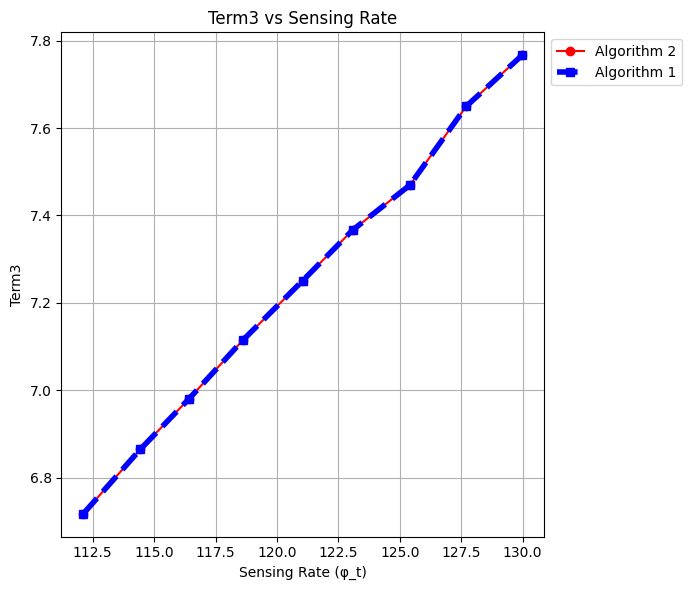

In [9]:
# TERM 3 VS Sensing rate
phi_values, term3_vals = zip(*term3_values)
phi_values_2, term3_vals_2 = zip(*term3_values_2)

# Calculate average term3 for binned phi_t values
phi_bins = np.linspace(min(phi_values), max(phi_values), 10)
phi_bins_2 = np.linspace(min(phi_values_2), max(phi_values_2), 10)
avg_term3 = []
avg_term3_2 = []
avg_phi = []
avg_phi_2 = []
top_points = []
top_points_2 = []

for i in range(len(phi_bins) - 1):
    mask = (phi_values >= phi_bins[i]) & (phi_values < phi_bins[i + 1])
    if np.any(mask):


        # Get top point in the bin
        bin_term3 = np.array(term3_vals)[mask]
        bin_phi = np.array(phi_values)[mask]
        top_index = np.argmax(bin_term3)
        top_points.append((bin_phi[top_index], bin_term3[top_index]))

for i in range(len(phi_bins_2) - 1):
     mask_2  = (phi_values_2 >= phi_bins_2[i]) & (phi_values_2 < phi_bins_2[i  + 1])
     if np.any(mask_2):


        # Get top point in the bin
        bin_term3_2 = np.array(term3_vals_2)[mask_2]
        bin_phi_2 = np.array(phi_values_2)[mask_2]
        top_index_2 = np.argmax(bin_term3_2)
        top_points_2.append((bin_phi_2[top_index_2], bin_term3_2[top_index_2]))


# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)



# Plot top points and connect them
top_phi, top_term3 = zip(*top_points)
top_phi_2, top_term3_2 = zip(*top_points_2)
plt.plot(top_phi, top_term3, linestyle='-', linewidth=1.5,  color = "red",marker ='o', label='Algorithm 2')
plt.plot(top_phi_2, top_term3_2, linestyle='--', linewidth=4, color="blue", marker ='s' , label='Algorithm 1')

# Labels and title
plt.xlabel("Sensing Rate (φ_t)")
plt.ylabel("Term3")
plt.title("Term3 vs Sensing Rate")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("Term3 Vs Sensing Rate.png", dpi=1000, bbox_inches='tight')
plt.show()

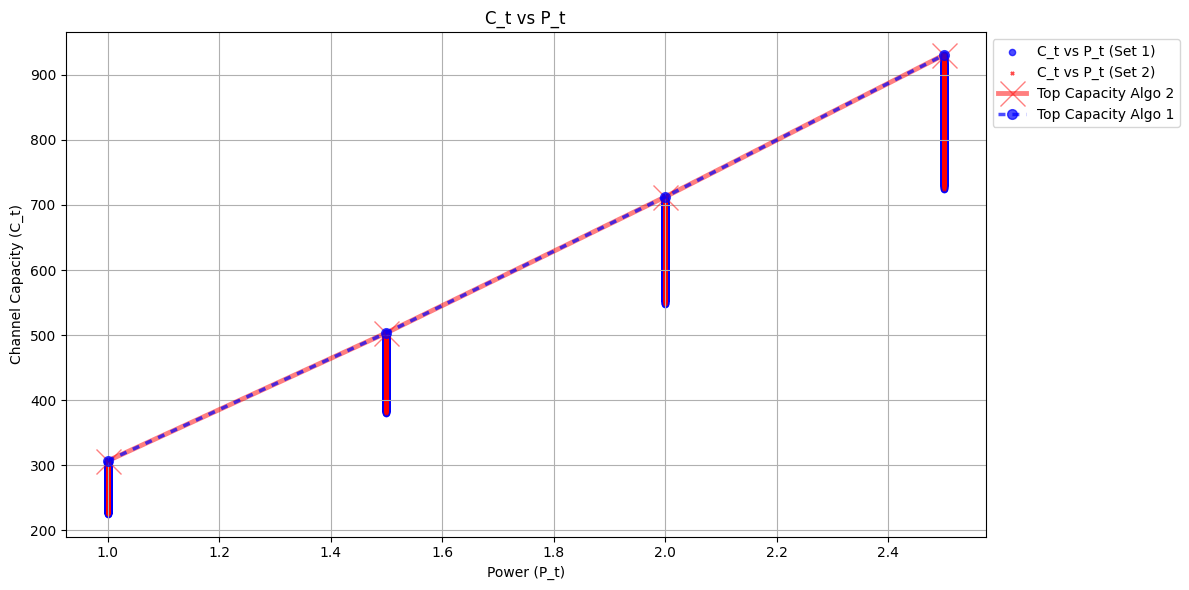

In [10]:
# Subplot 5: C_t vs P_t with a line connecting top points

plt.figure(figsize=(12,6))
# Extract capacities and powers for plotting
capacities, powers = zip(*capacity_vs_power)
capacities2, powers2 = zip(*capacity2_vs_power)

# Scatter plot for all data points
plt.scatter(powers, capacities, color='blue', marker='o', s=20, alpha=0.7, label="C_t vs P_t (Set 1)")
plt.scatter(powers2, capacities2, color='red', marker='x', s=5, alpha=0.7, label="C_t vs P_t (Set 2)")

# Find top points for each power (highest C_t for each P_t)
top_points_ct_pt = []
for P_t in P_t_values:
    max_capacity_point = max([(c, p) for c, p in zip(capacities, powers) if p == P_t], key=lambda x: x[0], default=None)
    if max_capacity_point:
        top_points_ct_pt.append(max_capacity_point)
top_points_ct_pt2 = []
for P_t in P_t_values:
    max_capacity_point2 = max([(c, p) for c, p in zip(capacities2, powers2) if p == P_t], key=lambda x: x[0], default=None)
    if max_capacity_point2:
        top_points_ct_pt2.append(max_capacity_point2)

# Plot a line connecting the top points
top_capacities, top_powers = zip(*top_points_ct_pt)
top_capacities2, top_powers2 = zip(*top_points_ct_pt2)


plt.plot(top_powers, top_capacities, color='red', marker='x',markersize=18,label="Top Capacity Algo 2", linestyle='-', linewidth=3.5, alpha=0.5)
plt.plot(top_powers2, top_capacities2, color='blue', marker='o',markersize=7,label="Top Capacity Algo 1", linestyle='--', linewidth=2.5, alpha=0.7,dashes=(2,2))
plt.legend(loc='upper left', fontsize=12, frameon = True)


# Labels and title
plt.xlabel("Power (P_t)")
plt.ylabel("Channel Capacity (C_t)")
plt.title("C_t vs P_t")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("Term3 Vs Sensing Rate.png", dpi=1000, bbox_inches='tight')
plt.show()

<ipython-input-11-249c6450a6c7>:36: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(C_t, L_edge1, 'b-', linewidth=2, label='Algorithm 1',linestyle='--')
<ipython-input-11-249c6450a6c7>:37: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(C_t, L_edge2, 'r-', linewidth=2, label='Algorithm 2',linestyle='-')


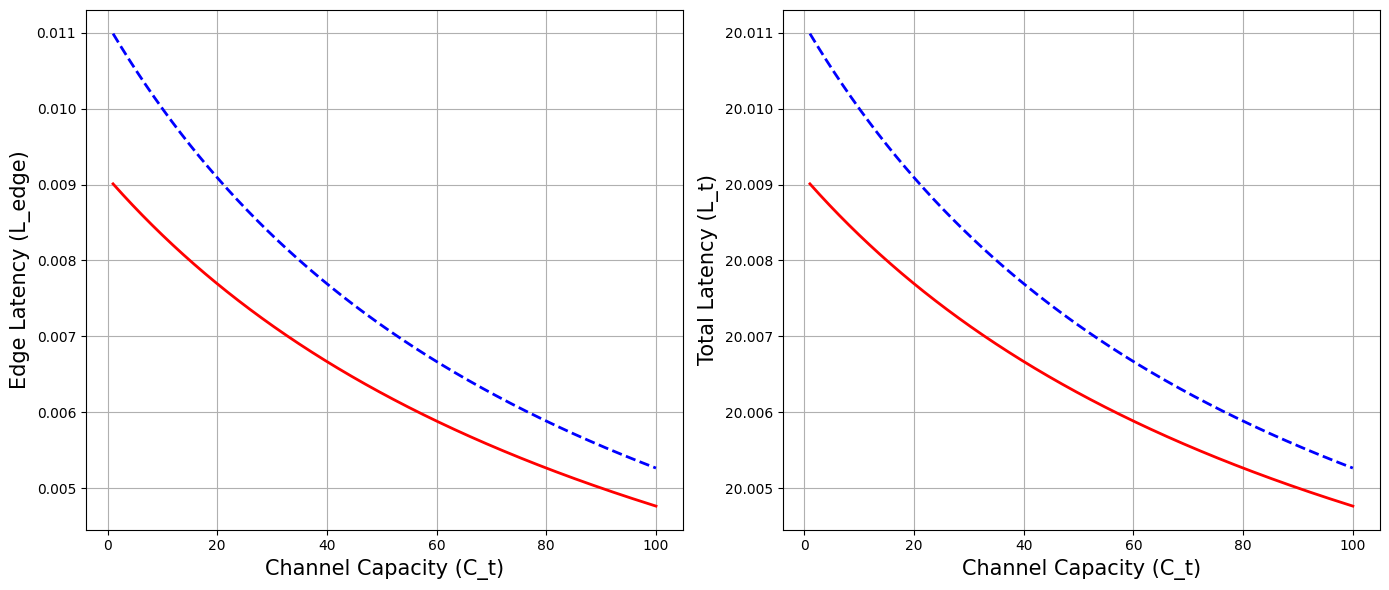

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate capacity values
C_t = np.linspace(1, 100, 1000)  # Channel capacity values

# Constants from your original code
alpha_5 = 1.0
beta_1 = 1.0
f_t = 90  # Example value from f_t_values
L_comm_constant = 20  # Constant L_comm value as requested

# Calculate L_edge and L_t based on the formulas in your code
L_edge = 1 / (alpha_5 * f_t + beta_1 * C_t)  # Formula from your code
L_t = L_edge + L_comm_constant  # Total latency with constant L_comm

# Now let's create versions for both algorithms
# Generate capacity values
C_t = np.linspace(1, 100, 1000)

# Constants for Algorithm 1
f_t1 = 90  # from f_t_values
L_edge1 = 1 / (alpha_5 * f_t1 + beta_1 * C_t)
L_t1 = L_edge1 + L_comm_constant

# Constants for Algorithm 2 (using a different f_t value to show distinction)
f_t2 = 110  # different f_t value
L_edge2 = 1 / (alpha_5 * f_t2 + beta_1 * C_t)
L_t2 = L_edge2 + L_comm_constant

# Create the comparison plots
plt.figure(figsize=(14, 6))

# Plot L_edge vs C_t for both algorithms
plt.subplot(1, 2, 1)
plt.plot(C_t, L_edge1, 'b-', linewidth=2, label='Algorithm 1',linestyle='--')
plt.plot(C_t, L_edge2, 'r-', linewidth=2, label='Algorithm 2',linestyle='-')
plt.xlabel("Channel Capacity (C_t)",fontsize=15)
plt.ylabel("Edge Latency (L_edge)",fontsize=15)
#plt.title("Edge Latency (L_edge) vs Channel Capacity (C_t)")
plt.grid(True)
# Plot L_t vs C_t for both algorithms
plt.subplot(1, 2, 2)
plt.plot(C_t, L_t1, 'blue', linewidth=2, label='Algorithm 1',linestyle='--')
plt.plot(C_t, L_t2, 'red', linewidth=2, label='Algorithm 2',linestyle='-')
plt.xlabel("Channel Capacity (C_t)",fontsize=15)
plt.ylabel("Total Latency (L_t)",fontsize=15)
#plt.title(f"Total Latency (L_t) vs Channel Capacity (C_t)\nwith constant L_comm = {L_comm_constant}")
plt.grid(True)
plt.tight_layout()
plt.savefig("Latency Vs Channel Capacity.png", dpi=1000, bbox_inches='tight')
plt.show()

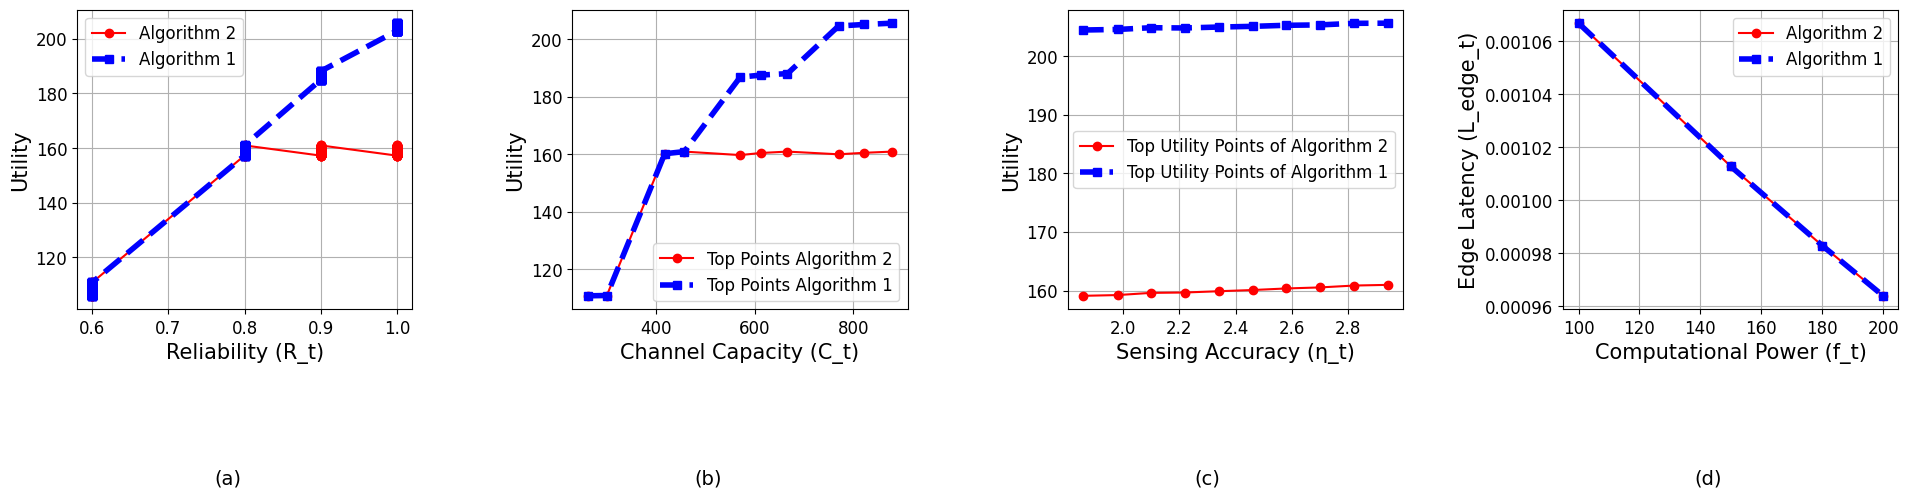

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 5))

# **Plot 1: Utility vs Reliability**
plt.subplot(1, 4, 1)
reliabilities, utilities = zip(*utility_vs_reliability)
sorted_reliabilities, sorted_utilities = zip(*sorted(zip(reliabilities, utilities)))
reliabilities2, utilities2 = zip(*utility2_vs_reliability)
sorted_reliabilities2, sorted_utilities2 = zip(*sorted(zip(reliabilities2, utilities2)))
plt.plot(sorted_reliabilities, sorted_utilities, marker='o', linestyle='-', linewidth=1.5, color='red', label='Algorithm 2')
plt.plot(sorted_reliabilities2, sorted_utilities2, marker='s', linestyle='--', linewidth=4, color='blue', label='Algorithm 1')
plt.xlabel("Reliability (R_t)", fontsize=15)
plt.ylabel("Utility", fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.text(0.13, -0.06, "(a)", fontsize=14, transform=plt.gcf().transFigure)
plt.legend(fontsize=12)
plt.grid(True)

# **Plot 2: Utility vs Channel Capacity**
plt.subplot(1, 4, 2)
utility_vs_capacity.sort()
utility2_vs_capacity.sort()
capacity_values, utility_values = zip(*utility_vs_capacity)
capacity_values, utility_values2 = zip(*utility2_vs_capacity)
num_bins = 10
bin_indices = np.linspace(min(capacity_values), max(capacity_values), num_bins + 1)
top_points, top_points_2 = [], []

for i in range(num_bins):
    bin_start, bin_end = bin_indices[i], bin_indices[i + 1]
    bin_points = [(c, u) for c, u in utility_vs_capacity if bin_start <= c < bin_end]
    bin_points2 = [(c, u2) for c, u2 in utility2_vs_capacity if bin_start <= c < bin_end]
    if bin_points:
        capacities, utilities = zip(*bin_points)
        capacities, utilities2 = zip(*bin_points2)
        top_points.append((np.mean(capacities), max(utilities)))
        top_points_2.append((np.mean(capacities), max(utilities2)))

top_capacities, top_utilities = zip(*top_points)
top_capacities, top_utilities2 = zip(*top_points_2)
plt.plot(top_capacities, top_utilities, color='red', marker='o', linewidth=1.5, label="Top Points Algorithm 2", linestyle='-')
plt.plot(top_capacities, top_utilities2, color='blue', marker='s', linewidth=4, label="Top Points Algorithm 1", linestyle='--')
plt.xlabel("Channel Capacity (C_t)", fontsize=15)
plt.ylabel("Utility", fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.text(0.37, -0.06, "(b)", fontsize=14, transform=plt.gcf().transFigure)
plt.legend(fontsize=12)
plt.grid(True)

# **Plot 3: Utility vs Sensing Accuracy**
plt.subplot(1, 4, 3)
utility_vs_eta.sort()
utility2_vs_eta.sort()
eta_values, utility_values = zip(*utility_vs_eta)
eta_values, utility_values2 = zip(*utility2_vs_eta)
bin_indices = np.linspace(min(eta_values), max(eta_values), num_bins + 1)
top_points, top_points_2 = [], []

for i in range(num_bins):
    bin_start, bin_end = bin_indices[i], bin_indices[i + 1]
    bin_points = [(e, u) for e, u in utility_vs_eta if bin_start <= e < bin_end]
    bin_points2 = [(e, u2) for e, u2 in utility2_vs_eta if bin_start <= e < bin_end]
    if bin_points:
        etas, utilities = zip(*bin_points)
        etas, utilities2 = zip(*bin_points2)
        top_points.append((np.mean(etas), max(utilities)))
        top_points_2.append((np.mean(etas), max(utilities2)))

top_etas, top_utilities = zip(*top_points)
top_etas, top_utilities2 = zip(*top_points_2)
plt.plot(top_etas, top_utilities, color='red', marker='o', linestyle='-', linewidth=1.5, label="Top Utility Points of Algorithm 2")
plt.plot(top_etas, top_utilities2, color='blue', marker='s', linestyle='--', linewidth=4, label="Top Utility Points of Algorithm 1")
plt.xlabel("Sensing Accuracy (η_t)", fontsize=15)
plt.ylabel("Utility", fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.text(0.62, -0.06, "(c)", fontsize=14, transform=plt.gcf().transFigure)
plt.legend(fontsize=12)
plt.grid(True)

# **Plot 4: Edge Latency vs Computational Power**
plt.subplot(1, 4, 4)
plt.plot(f_t_values, L_edge_t_values, marker='o', linestyle='-', color='red', linewidth=1.5, label='Algorithm 2')
plt.plot(f_t_values, L_edge_t_values_2, marker='s', linestyle='--', color='blue', linewidth=4, label='Algorithm 1')
plt.xlabel("Computational Power (f_t)", fontsize=15)
plt.ylabel("Edge Latency (L_edge_t)", fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.text(0.87, -0.06, "(d)", fontsize=14, transform=plt.gcf().transFigure)
plt.legend(fontsize=12)
plt.grid(True)

# Adjust layout and save
plt.tight_layout(pad=4.0)  # Increases space between subplots
plt.savefig("C:\\Users\\yashs\\Pictures\\savedimages\\All_Plots.png", dpi=1000, bbox_inches='tight')
plt.show()

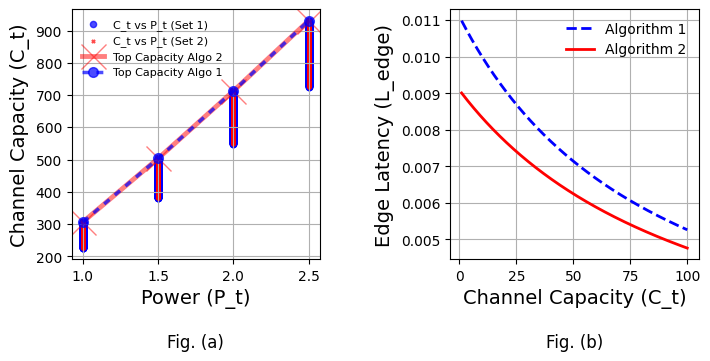

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create a single figure for both plots
plt.figure(figsize=(8, 5))  # Fits single-column in research paper

# --- Subplot 1: C_t vs P_t ---
plt.subplot(1, 2, 1)  # Two subplots side by side

# Extract capacities and powers for plotting
capacities, powers = zip(*capacity_vs_power)
capacities2, powers2 = zip(*capacity2_vs_power)

# Scatter plot for all data points
plt.scatter(powers, capacities, color='blue', marker='o', s=20, alpha=0.7, label="C_t vs P_t (Set 1)")
plt.scatter(powers2, capacities2, color='red', marker='x', s=5, alpha=0.7, label="C_t vs P_t (Set 2)")

# Find top points for each power (highest C_t for each P_t)
top_points_ct_pt = []
for P_t in P_t_values:
    max_capacity_point = max([(c, p) for c, p in zip(capacities, powers) if p == P_t], key=lambda x: x[0], default=None)
    if max_capacity_point:
        top_points_ct_pt.append(max_capacity_point)

top_points_ct_pt2 = []
for P_t in P_t_values:
    max_capacity_point2 = max([(c, p) for c, p in zip(capacities2, powers2) if p == P_t], key=lambda x: x[0], default=None)
    if max_capacity_point2:
        top_points_ct_pt2.append(max_capacity_point2)

# Plot a line connecting the top points
top_capacities, top_powers = zip(*top_points_ct_pt)
top_capacities2, top_powers2 = zip(*top_points_ct_pt2)

plt.plot(top_powers, top_capacities, color='red', marker='x', markersize=18, label="Top Capacity Algo 2", linestyle='-', linewidth=3.5, alpha=0.5)
plt.plot(top_powers2, top_capacities2, color='blue', marker='o', markersize=7, label="Top Capacity Algo 1", linestyle='--', linewidth=2.5, alpha=0.7, dashes=(2,2))

plt.xlabel("Power (P_t)", fontsize=14)
plt.ylabel("Channel Capacity (C_t)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=8, loc='upper left', frameon=False)  # Smaller legend, no border

# Add "Fig. (a)" at the bottom of Subplot 1
plt.text(0.5, -0.35, 'Fig. (a)', transform=plt.gca().transAxes, fontsize=12, ha='center')

# --- Subplot 2: L_edge vs C_t ---
plt.subplot(1, 2, 2)  # Second plot in same figure

# Generate capacity values
C_t = np.linspace(1, 100, 1000)

# Constants from your original code
alpha_5 = 1.0
beta_1 = 1.0
L_comm_constant = 20  # Constant L_comm value

# Algorithm 1
f_t1 = 90
L_edge1 = 1 / (alpha_5 * f_t1 + beta_1 * C_t)
L_t1 = L_edge1 + L_comm_constant

# Algorithm 2
f_t2 = 110
L_edge2 = 1 / (alpha_5 * f_t2 + beta_1 * C_t)
L_t2 = L_edge2 + L_comm_constant

# Plot L_edge vs C_t
plt.plot(C_t, L_edge1, 'b--', linewidth=2, label='Algorithm 1')
plt.plot(C_t, L_edge2, 'r-', linewidth=2, label='Algorithm 2')

plt.xlabel("Channel Capacity (C_t)", fontsize=14)
plt.ylabel("Edge Latency (L_edge)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=10, loc='upper right', frameon=False)  # Smaller legend, no border

# Add "Fig. (b)" at the bottom of Subplot 2
plt.text(0.5, -0.35, 'Fig. (b)', transform=plt.gca().transAxes, fontsize=12, ha='center')

# --- Final Adjustments ---
plt.tight_layout(pad=4)  # Ensures equal spacing
plt.savefig("C:\\Users\\yashs\\Pictures\\savedimages\\Comparison_Plots.png", dpi=1000, bbox_inches='tight')  # Save high-res figure
plt.show()
